In [2]:
#import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

# PREPARE DATA

## Import Data

In [3]:
#define wrangle function
def wrangle(filepath):
    #read csv file
    df=pd.read_csv(filepath)
    #Kenya only
    kenya=df["country"]=="Kenya"
    df=df[kenya]
    #drop columns that has low or high cardinality
    df.drop(columns=["uniqueid","year","gender_of_respondent"],inplace=True)
    return df

In [20]:
df=wrangle("Train (1).csv")
df.head()

,country,bank_account,location_type,cellphone_access,household_size,age_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,Yes,Rural,Yes,3,24,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5,70,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5,26,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5,34,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8,26,Child,Single/Never Married,Primary education,Informally employed


# EXPLORE THE DATA

In [17]:
df.isna().sum()

country                   0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [21]:
df.drop(columns=["marital_status","relationship_with_head","household_size"],axis=1,inplace=True)
df.head()

,country,bank_account,location_type,cellphone_access,age_of_respondent,education_level,job_type
0,Kenya,Yes,Rural,Yes,24,Secondary education,Self employed
1,Kenya,No,Rural,No,70,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,26,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,34,Primary education,Formally employed Private
4,Kenya,No,Urban,No,26,Primary education,Informally employed


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 6067
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            6068 non-null   object
 1   bank_account       6068 non-null   object
 2   location_type      6068 non-null   object
 3   cellphone_access   6068 non-null   object
 4   age_of_respondent  6068 non-null   int64 
 5   education_level    6068 non-null   object
 6   job_type           6068 non-null   object
dtypes: int64(1), object(6)
memory usage: 379.2+ KB


In [16]:
df["job_type"].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer'], dtype=object)

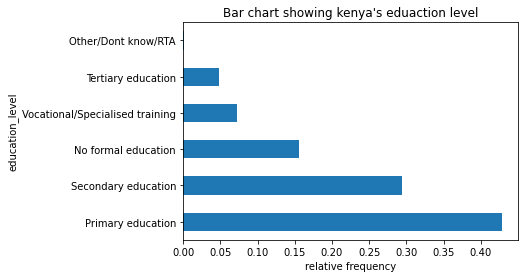

In [13]:
df["education_level"].value_counts(normalize=True).plot(kind="barh")
plt.xlabel("relative frequency")
plt.ylabel("education_level")
plt.title("Bar chart showing kenya's eduaction level");

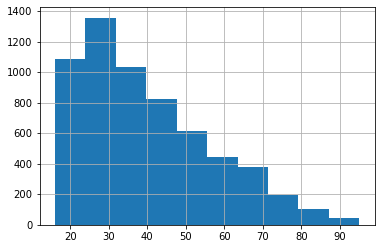

In [37]:
df["age_of_respondent"].hist();

In [29]:
df["location_type"].value_counts()

Rural    3543
Urban    2525
Name: location_type, dtype: int64

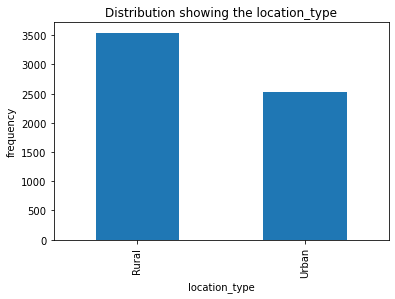

In [31]:
df["location_type"].value_counts().plot(kind="bar")
plt.xlabel("location_type")
plt.ylabel("frequency")
plt.title("Distribution showing the location_type");

###### people living in the Rural areas are higher than those in urban areas from our dataset.Number of people in rural is
###### 3,500 and number of people in urban is 2500

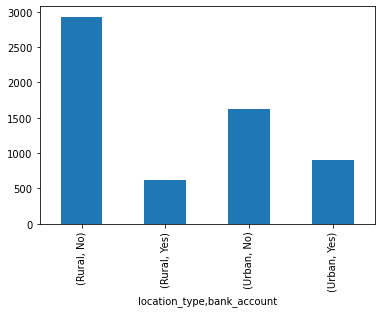

In [32]:
df.groupby("location_type")["bank_account"].value_counts().plot(kind="bar");

In [12]:
#From the bar chart above,2929 people from rural areas have no bank account. And this could be due to some factors like, bank
#or bank not operating in such areas, network connectivity and so on. 1618 people from urban areas have no bank account.
# 907  people from urban areas have  bank account and 614  people from rural areas have  bank account

In [63]:
df["bank_account"].value_counts()

No     4547
Yes    1521
Name: bank_account, dtype: int64

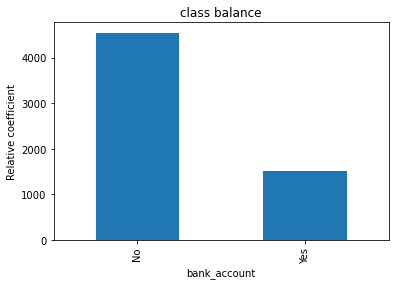

In [38]:
df["bank_account"].value_counts().plot(kind="bar", xlabel="bank_account",ylabel="Relative coefficient",
                                                    title="class balance");

In [14]:
#from the bar chart above, 75% of people from rural and urban don't have bank account(i.e, major class) and 25% of people 
# have bank account(i.e, minor class)

In [43]:
df.head()

,country,bank_account,location_type,cellphone_access,age_of_respondent,education_level,job_type
0,Kenya,Yes,Rural,Yes,24,Secondary education,Self employed
1,Kenya,No,Rural,No,70,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,26,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,34,Primary education,Formally employed Private
4,Kenya,No,Urban,No,26,Primary education,Informally employed


# SPLIT THE DATA

In [44]:
X=df.drop(columns="bank_account")
y=df["bank_account"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_train shape: (4854, 6)
y_train shape: (4854,)
X_test shape: (1214, 6)
y_test shape: (1214,)


### Baseline

In [47]:
Baseline=df["bank_account"].value_counts(normalize=True).max()
base_acc=round(Baseline,4)
print(base_acc)

0.7493


# BUILD MODEL

In [61]:
model=make_pipeline(OneHotEncoder(handle_unknown="ignore"),LogisticRegression(max_iter=1000, random_state=42))

In [62]:
#Build model
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

# EVALUATE THE MODEL

In [60]:
y_train_pred=accuracy_score(y_train,model.predict(X_train))
y_val_pred=accuracy_score(y_test,model.predict(X_test))
print(round(y_train_pred,2))
print(round(y_val_pred,2))

0.82
0.79


# COMMUNICATE THE IMPORTANCE FEATURE USING BAR GRAPH

In [52]:
importances=model.named_steps["logisticregression"].coef_[0]

In [53]:
features=model.named_steps["onehotencoder"].get_feature_names()

In [54]:
import numpy as np
feat_imp=pd.Series(np.exp(importances),features).sort_values().head(10)

In [57]:
feat_imp

x3_74                              2.110179
x3_68                              2.154045
x3_86                              2.243736
x3_82                              2.429091
x3_84                              2.689999
x3_71                              3.017987
x3_76                              3.397291
x5_Formally employed Government    3.722087
x4_Tertiary education              3.837263
x3_80                              5.578428
dtype: float64

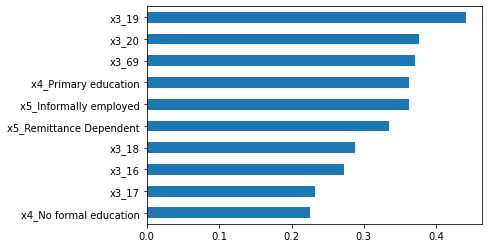

In [55]:
# Horizontal bar chart, ten smallest coefficients
feat_imp.plot(kind="barh");

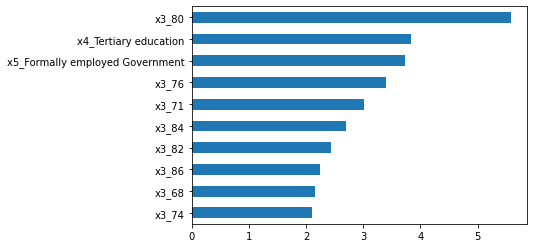

In [56]:
# Horizontal bar chart, Ten largest coefficients
feat_imp=pd.Series(np.exp(importances),features).sort_values().tail(10)
feat_imp.plot(kind="barh");